In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('cluster_bank_transactions.csv')

In [3]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [4]:
df.tail()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0
1048566,T1048567,C8337524,5/3/84,M,PUNE,75734.42,18/9/16,181222,1166.0


- TransactionID 제거
- DOB 나이값으로 변환
- TransactionDate, Time -> Integer값으로 분할
- 요일 변수 추가, 분 및 초 삭제
- 성별 인코딩

- RFM 분석을 진행할 경우, 일 + 시간 단위로 Recency 계산

# 1. Normal Clustering

In [20]:
df_no = df.copy()

In [21]:
df_no.drop('TransactionID', axis = 1, inplace = True)

In [9]:
df_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CustomerID               1048567 non-null  object 
 1   CustomerDOB              1045170 non-null  object 
 2   CustGender               1047467 non-null  object 
 3   CustLocation             1048416 non-null  object 
 4   CustAccountBalance       1046198 non-null  float64
 5   TransactionDate          1048567 non-null  object 
 6   TransactionTime          1048567 non-null  int64  
 7   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 64.0+ MB


In [22]:
df_no['CustomerDOB'] = pd.to_datetime(df_no['CustomerDOB'])
df_no['TransactionDate'] = pd.to_datetime(df_no['TransactionDate'])

In [13]:
max(df_no['TransactionDate'])

Timestamp('2016-12-09 00:00:00')

2016년 12월 10일을 기준으로 계산 진행

In [14]:
len(df_no['CustomerID'].unique())

884265

In [15]:
len(df_no['CustLocation'].unique())

9356

In [23]:
df_no['Age'] = 2016 - df_no['CustomerDOB'].dt.year

In [37]:
df_no['AcDate'] = pd.to_datetime('2016-12-10') - df_no['TransactionDate']

In [38]:
df_no

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,AcDate
0,C5841053,1994-10-01,0,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22.0,306 days
1,C2142763,2057-04-04,1,JHAJJAR,2270.69,2016-02-08,141858,27999.0,59.0,306 days
2,C4417068,1996-11-26,0,MUMBAI,17874.44,2016-02-08,142712,459.0,20.0,306 days
3,C5342380,1973-09-14,0,MUMBAI,866503.21,2016-02-08,142714,2060.0,43.0,306 days
4,C9031234,1988-03-24,0,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28.0,306 days
...,...,...,...,...,...,...,...,...,...,...
1048562,C8020229,1990-08-04,1,NEW DELHI,7635.19,2016-09-18,184824,799.0,26.0,83 days
1048563,C6459278,1992-02-20,1,NASHIK,27311.42,2016-09-18,183734,460.0,24.0,83 days
1048564,C6412354,1989-05-18,1,HYDERABAD,221757.06,2016-09-18,183313,770.0,27.0,83 days
1048565,C6420483,1978-08-30,1,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38.0,83 days


In [30]:
for i in range(len(df_no)):
    if df_no['Age'][i] < 0:
        df_no['Age'][i] += 100
    elif df_no['Age'][i] > 100:
        df_no['Age'][i] = np.nan

In [33]:
df_no.dropna(inplace = True)

In [28]:
df_no['CustomerID'].value_counts()

C5533885    6
C6624352    6
C1736254    6
C6735477    6
C1113684    6
           ..
C8716232    1
C4474828    1
C3341662    1
C6821983    1
C6420483    1
Name: CustomerID, Length: 884265, dtype: int64

In [39]:
df_no[df_no['CustomerID'] == 'C5533885']

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,AcDate
28272,C5533885,1990-10-07,1,KOLKATA,9283.45,2016-09-25,235351,108.00,26.0,76 days
49914,C5533885,1990-10-07,1,KOLKATA,9283.45,2016-03-08,143820,499.00,26.0,277 days
308974,C5533885,1988-05-22,1,THANE WEST,20845.31,2016-10-08,163930,918.86,28.0,63 days
481046,C5533885,1988-05-22,1,THANE WEST,20845.31,2016-08-21,224421,1180.68,28.0,111 days
705114,C5533885,2064-07-28,1,DELHI,74967.38,2016-08-31,171114,147.00,52.0,101 days


CustomerID와 CustomerAge로 Groupby한 후 분석 진행

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
lab = LabelEncoder()
lab.fit(df_no.CustGender)

LabelEncoder()

In [36]:
df_no.CustGender = lab.transform(df_no.CustGender)

In [40]:
aggregation = {
    'TransactionAmount (INR)':'sum',
    'AcDate':'min'
}

In [51]:
df_new = df_no.groupby(['CustomerID','Age','CustGender','CustAccountBalance']).agg(aggregation).reset_index()

In [52]:
df_new

,CustomerID,Age,CustGender,CustAccountBalance,TransactionAmount (INR),AcDate
0,C1010011,24.0,0,32500.73,4750.0,75 days
1,C1010011,33.0,1,120180.54,356.0,93 days
2,C1010012,22.0,1,24204.49,1499.0,118 days
3,C1010014,24.0,0,38377.14,1205.0,337 days
4,C1010014,32.0,1,161848.76,250.0,155 days
...,...,...,...,...,...,...
984122,C9099836,26.0,1,133067.23,691.0,155 days
984123,C9099877,20.0,1,96063.46,222.0,86 days
984124,C9099919,23.0,1,5559.75,126.0,114 days
984125,C9099941,21.0,1,35295.92,50.0,104 days


In [75]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984127 entries, 0 to 984126
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      984127 non-null  float64
 1   CustGender               984127 non-null  int64  
 2   CustAccountBalance       984127 non-null  float64
 3   TransactionAmount (INR)  984127 non-null  float64
 4   AcDate                   984127 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 37.5 MB


In [65]:
df_new['AcDate'] = df_new['AcDate'].dt.days

In [72]:
df_new.drop('CustomerID', axis = 1, inplace = True)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'CustGender'}>],
       [<AxesSubplot:title={'center':'CustAccountBalance'}>,
        <AxesSubplot:title={'center':'TransactionAmount (INR)'}>],
       [<AxesSubplot:title={'center':'AcDate'}>, <AxesSubplot:>]],
      dtype=object)

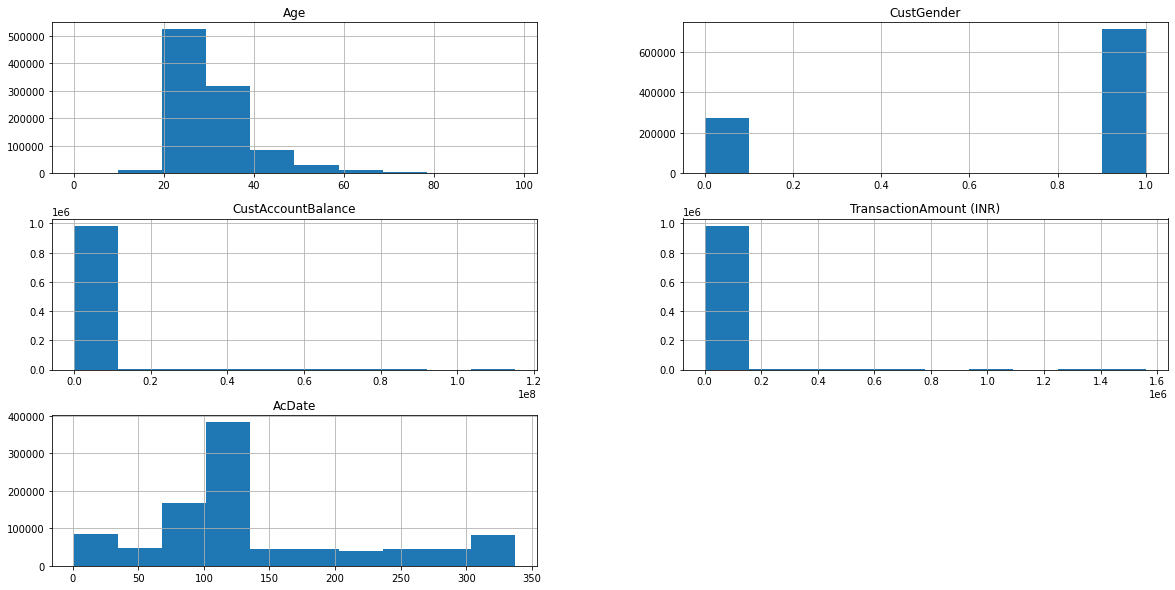

In [66]:
df_new.hist(figsize = (20, 10))

In [73]:
import seaborn as sns

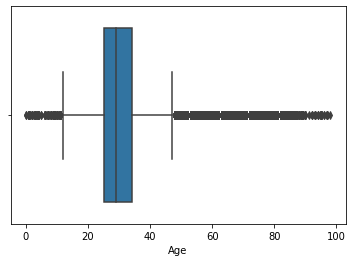

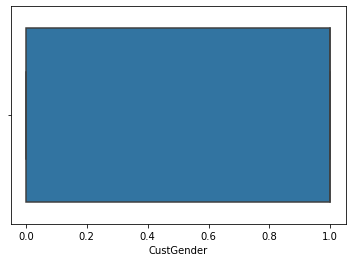

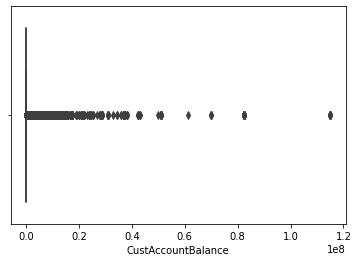

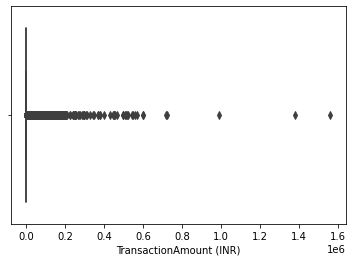

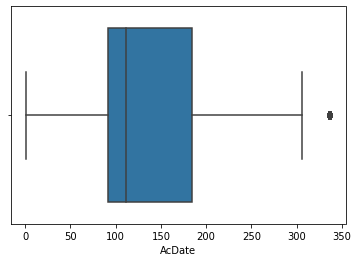

In [78]:
for i in df_new.columns:
    sns.boxplot( df_new[i] )
    plt.show()

In [83]:
df_new.describe(percentiles = [0.01,  0.25, 0.5, 0.75, 0.95, 0.99])

,Age,CustGender,CustAccountBalance,TransactionAmount (INR),AcDate
count,984127.000000,984127.000000,9.841270e+05,9.841270e+05,984127.000000
mean,31.029863,0.723052,1.059916e+05,1.454189e+03,137.302891
std,8.757031,0.447491,8.140840e+05,6.143693e+03,82.517605
min,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000
1%,19.000000,0.000000,3.470000e+00,8.620000e+00,1.000000
25%,25.000000,0.000000,4.580740e+03,1.520000e+02,92.000000
50%,29.000000,1.000000,1.600194e+04,4.329000e+02,112.000000
75%,34.000000,1.000000,5.375908e+04,1.129000e+03,184.000000
95%,48.000000,1.000000,3.844491e+05,5.000000e+03,306.000000
99%,63.000000,1.000000,1.413420e+06,1.838670e+04,337.000000


In [80]:
def get_outlier(data, col_name, li):
    q1, q3 = np.percentile(data[col_name], [25, 75])
    iqr = q3-q1
    lowest_val = q1 - iqr*1.5
    highest_val = q3 + iqr*1.5

    outlier_index = data[col_name][(data[col_name] < lowest_val) | (data[col_name] > highest_val)].index
    print(col_name, len(outlier_index))
    li.extend(outlier_index)

    return li

li = []
for out in df_new.columns:
    get_outlier(df_new, out, li)

Age 54328
CustGender 0
CustAccountBalance 130514
TransactionAmount (INR) 105500
AcDate 40138


In [81]:
print(len(li), len(set(li)), df_new.shape[0])

330480 268027 984127
